In [ ]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Data= pd.read_csv("/content/co2_emissions.csv",sep=";")

In [ ]:
Data.head(20)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS,Z,10.6,7.5,9.2,31,212


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [ ]:
# classification by finding unique values for better understanding

In [ ]:
print(Data['make'].unique())

['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']


In [ ]:
print(Data['model'].unique())

['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']


In [ ]:
print(Data['transmission'].unique())

['AS' 'M' 'AV' 'AM' 'A']


In [ ]:
# Putting different transmission sub-catagories into their respective catagories


Data['transmission'] = np.where(Data['transmission'].isin(['A4','A5','A6','A7','A8','A9','A10']),'Automatic',Data['transmission'])
Data['transmission'] = np.where(Data['transmission'].isin(['AS4','AS5','AS6','AS7','AS8','AS9','AS10']),'Automatic of Selective type',Data['transmission'])
Data['transmission'] = np.where(Data['transmission'].isin(['AM5','AM6','AM7','AM8','AM9']),'Automated Manual',Data['transmission'])
Data['transmission'] = np.where(Data['transmission'].isin(['AV','AV6','AV7','AV8','AV10']),'CVT',Data['transmission'])
Data['transmission'] = np.where(Data['transmission'].isin(['M5','M6','M7']),'Manual',Data['transmission'])

print(Data['transmission'].unique())

['AS' 'M' 'CVT' 'AM' 'A']


In [ ]:

print(Data['fuel_type'].value_counts())

Data['fuel_type']= np.where(Data['fuel_type']=='R','Regular gasoline',Data['fuel_type'])
Data['fuel_type']= np.where(Data['fuel_type']=='P','Premium gasoline',Data['fuel_type'])
Data['fuel_type']= np.where(Data['fuel_type']=='E','Ethanol',Data['fuel_type'])
Data['fuel_type']= np.where(Data['fuel_type']=='D','Diesel',Data['fuel_type'])
Data['fuel_type']= np.where(Data['fuel_type']=='N','Natural gas',Data['fuel_type'])

print(Data['fuel_type'].unique())

X    3637
Z    3202
E     370
D     175
N       1
Name: fuel_type, dtype: int64
['Z' 'Diesel' 'X' 'Ethanol' 'Natural gas']


In [ ]:
print(Data['vehicle_class'].unique())

['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']


In [ ]:
Data.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,CVT,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [ ]:
Data.shape

(7385, 12)

In [ ]:
Data.describe()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [ ]:
Data.isnull().sum()
# No Null values

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

In [ ]:
Data.corr()['co2_emissions'].sort_values()

fuel_consumption_comb(mpg)       -0.907426
cylinders                         0.832644
engine_size                       0.851145
fuel_consumption_hwy              0.883536
fuel_consumption_comb(l/100km)    0.918052
fuel_consumption_city             0.919592
co2_emissions                     1.000000
Name: co2_emissions, dtype: float64

In [ ]:
Data.corr()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
engine_size,1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
fuel_consumption_city,0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
fuel_consumption_hwy,0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
fuel_consumption_comb(l/100km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
fuel_consumption_comb(mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
co2_emissions,0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


In [ ]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_consumption_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_consumption_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_consumption_comb(l/100km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
fuel_consumption_comb(mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2_emissions,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


# Visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6966378a50>,
      dtype=object)

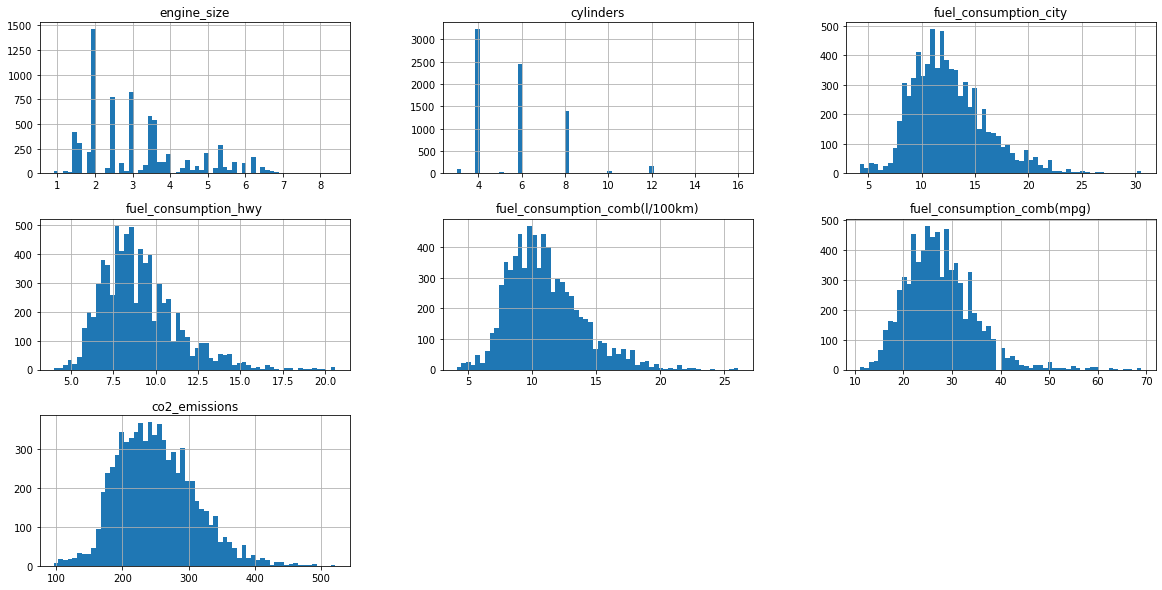

In [ ]:
# Histo
Data.hist(figsize=(20,10),bins=60)

In [ ]:
# Heatmap

Text(0.5, 1.0, 'Correlation')

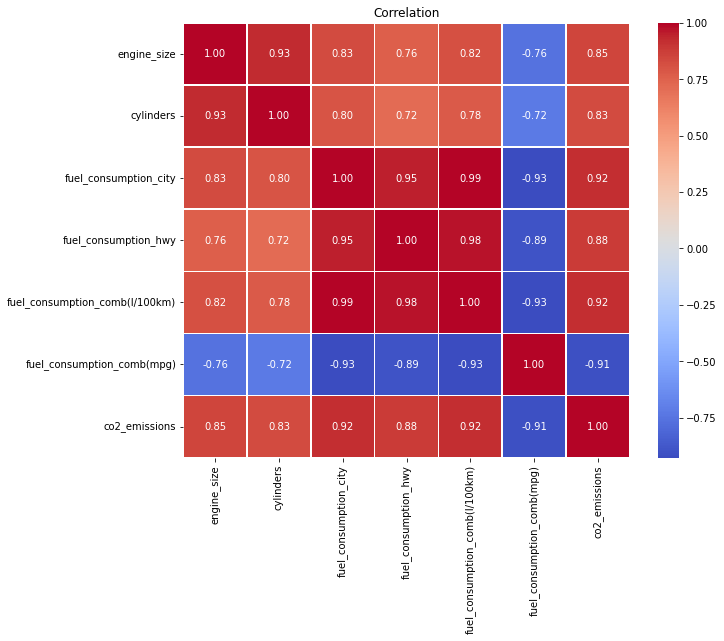

In [ ]:
corr = Data.corr()

plt.rcParams['figure.figsize']=(10,8)
sns.heatmap(corr, cmap='coolwarm', linewidth=0.5, fmt='0.2f', annot=True)

plt.title('Correlation')

In [ ]:
Data.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,CVT,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [ ]:
#FREQUENCY DISTRIBUTION

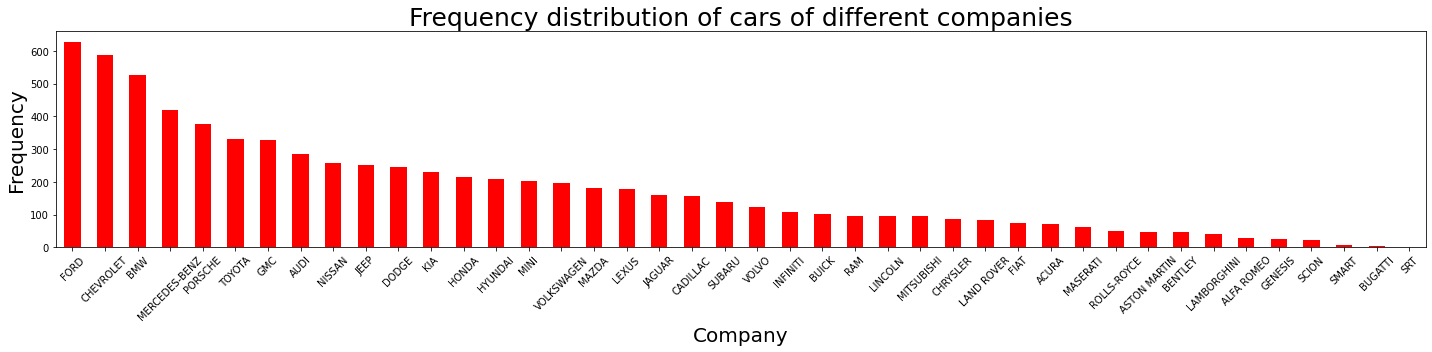

In [ ]:
# Make
plt.figure(figsize=(20,5))

Data.groupby('make')['make'].count().sort_values(ascending=False).plot(kind='bar',color='red')

plt.title('Frequency distribution of cars of different companies', fontsize=25)
plt.xlabel('Company', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

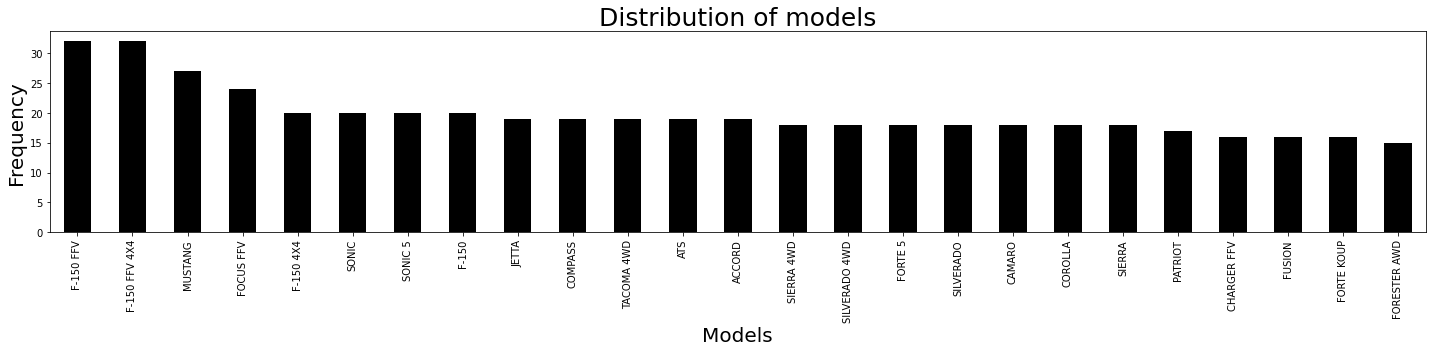

In [ ]:
# Model
plt.figure(figsize=(20,5))

Data.groupby('model')['model'].count().sort_values(ascending=False)[:25].plot(kind='bar',color = 'black')

plt.title('Distribution of models', fontsize=25)
plt.xlabel('Models', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

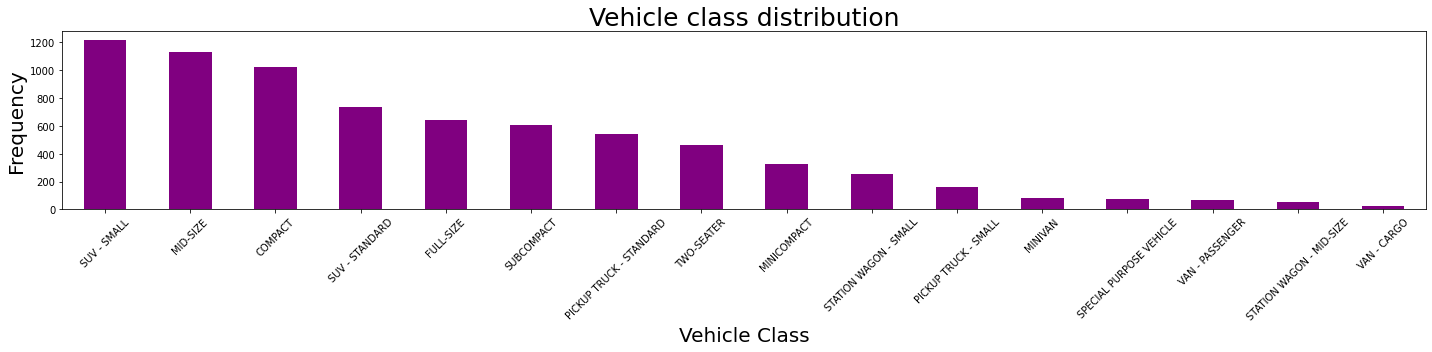

In [ ]:
# Vehicle Class

plt.figure(figsize=(20,5))

Data.groupby('vehicle_class')['vehicle_class'].count().sort_values(ascending=False).plot(kind='bar', color='Purple')

plt.title('Vehicle class distribution', fontsize=25)
plt.xlabel('Vehicle Class', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

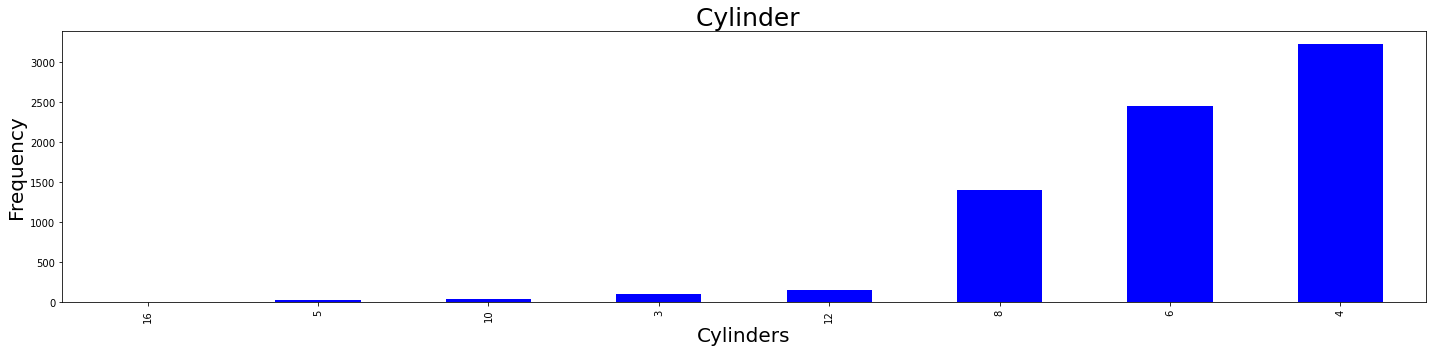

In [ ]:
# Cylinders

plt.figure(figsize=(20,5))

Data.groupby('cylinders')['cylinders'].count().sort_values(ascending=True).plot(kind='bar', color='Blue')

plt.title(' Cylinder', fontsize=25)
plt.xlabel('Cylinders', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

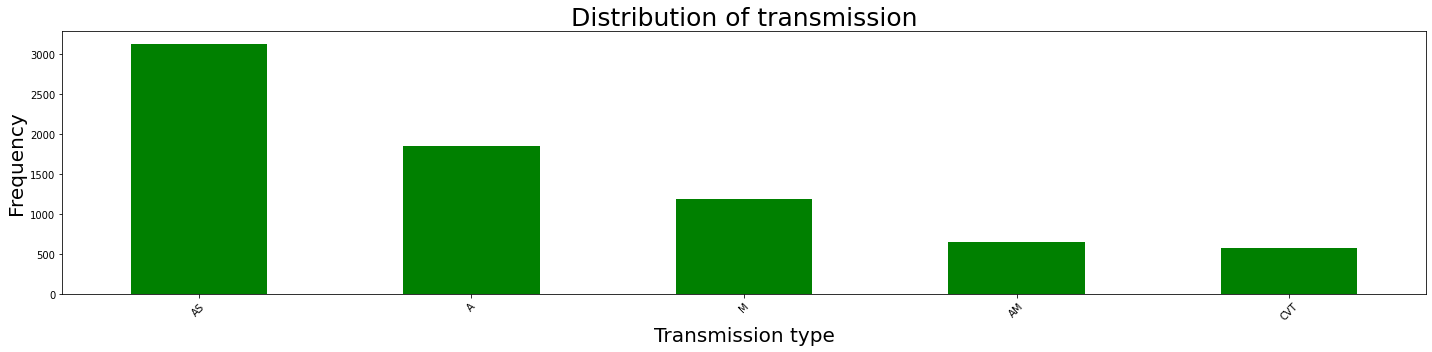

In [ ]:
# Transmission

plt.figure(figsize=(20,5))

Data.groupby('transmission')['transmission'].count().sort_values(ascending=False).plot(kind='bar', color='Green')

plt.title('Distribution of transmission', fontsize=25)
plt.xlabel('Transmission type', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

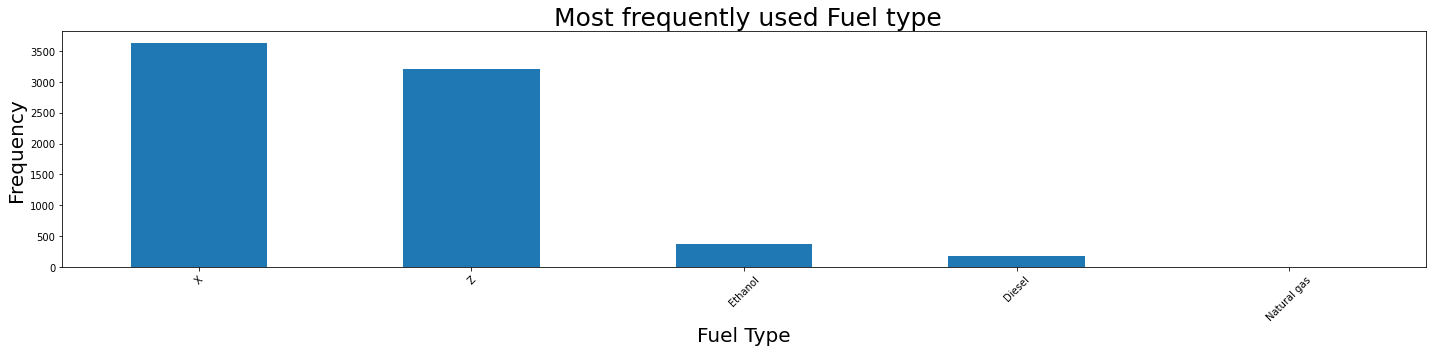

In [ ]:
# Fuel Type

plt.figure(figsize=(20,5))

Data.groupby('fuel_type')['fuel_type'].count().sort_values(ascending=False).plot(kind='bar')

plt.title(' Most frequently used Fuel type', fontsize=25)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

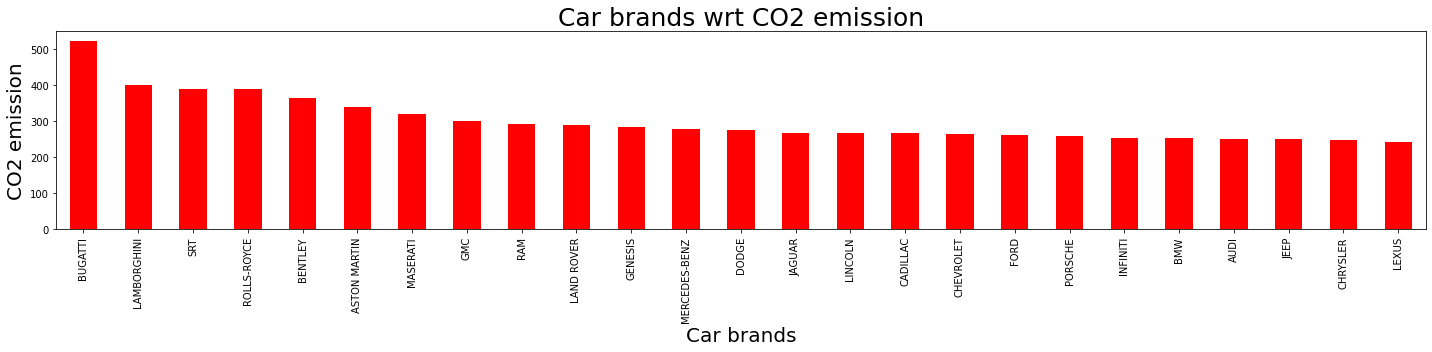

In [ ]:
#  CO2 emision

plt.figure(figsize=(20,5))

Data.groupby('make')['co2_emissions'].mean().sort_values(ascending=False)[:25].plot(kind='bar', color='red')

plt.title('Car brands wrt CO2 emission', fontsize=25)
plt.xlabel('Car brands', fontsize=20)
plt.ylabel('CO2 emission', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

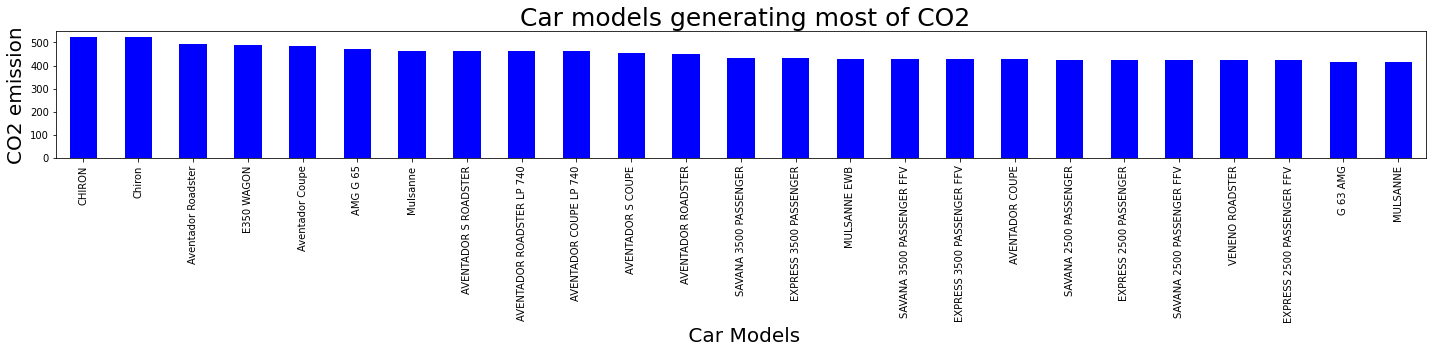

In [ ]:
plt.figure(figsize=(20,5))

Data.groupby('model')['co2_emissions'].mean().sort_values(ascending=False)[:25].plot(kind='bar', color='blue')

plt.title(' Car models generating most of CO2', fontsize=25)
plt.xlabel(' Car Models', fontsize=20)
plt.ylabel('CO2 emission', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

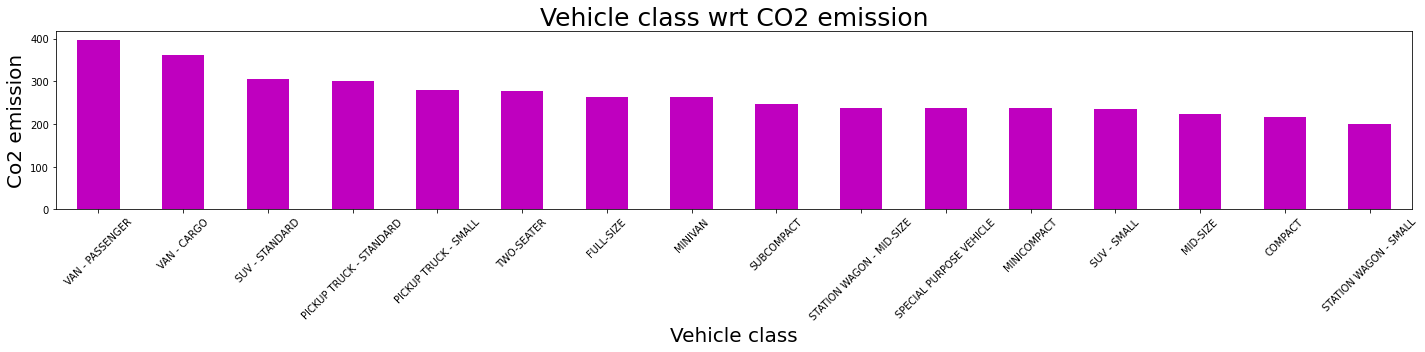

In [ ]:
plt.figure(figsize=(20,5))

Data.groupby('vehicle_class')['co2_emissions'].mean().sort_values(ascending=False).plot(kind='bar',color='m')

plt.title('Vehicle class wrt CO2 emission', fontsize=25)
plt.xlabel('Vehicle class' , fontsize=20)
plt.ylabel('Co2 emission', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

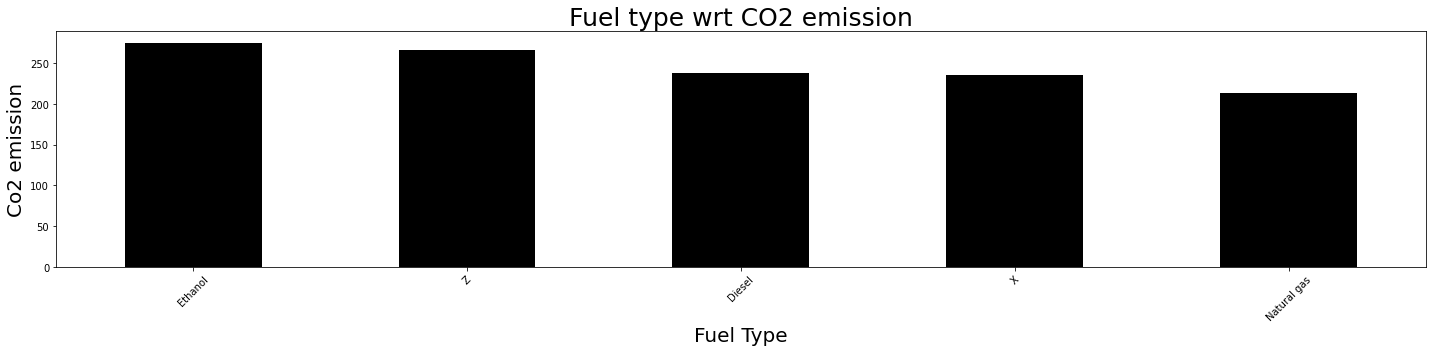

In [ ]:
plt.figure(figsize=(20,5))

Data.groupby('fuel_type')['co2_emissions'].mean().sort_values(ascending=False).plot(kind='bar',color='black')

plt.title('Fuel type wrt CO2 emission', fontsize=25)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Co2 emission', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

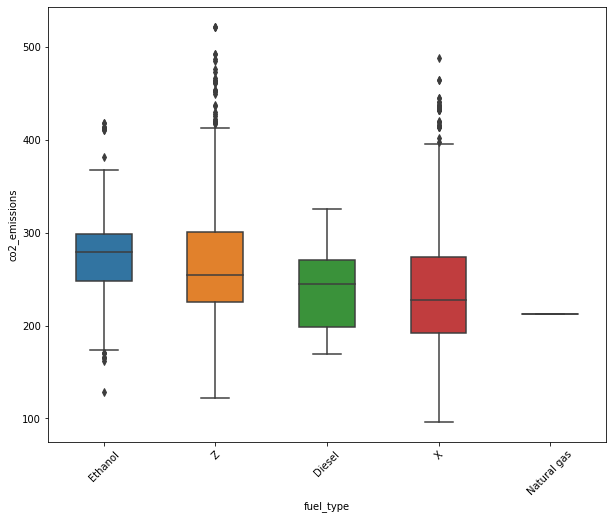

In [ ]:
# Boxplot
fuel_type = Data.groupby('fuel_type')['co2_emissions'].median().sort_values(ascending=False).index
plt.figure(figsize=(10,8))
sns.boxplot(x = 'fuel_type', y='co2_emissions', data =Data, order=fuel_type, width=0.5)
plt.xticks(rotation=45, horizontalalignment='center')

plt.show()

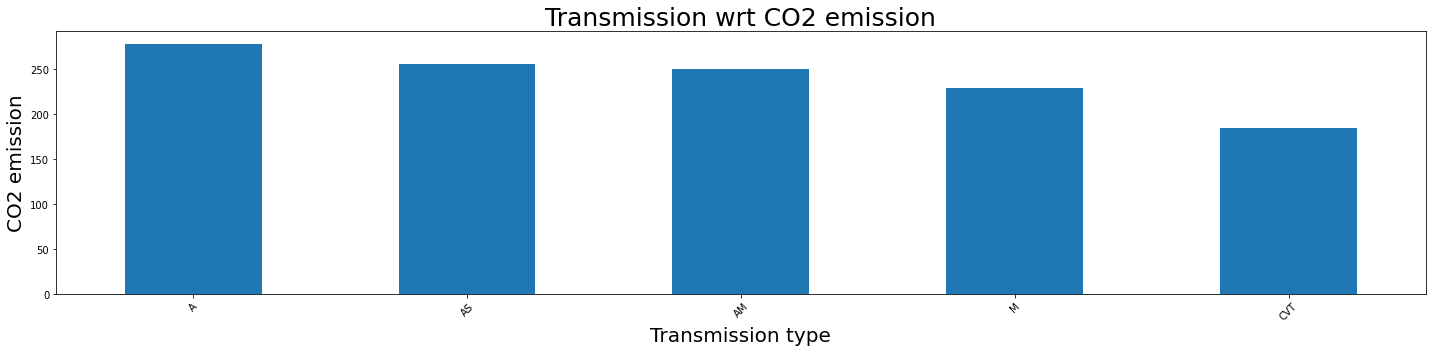

In [ ]:
plt.figure(figsize=(20,5))

Data.groupby('transmission')['co2_emissions'].mean().sort_values(ascending=False).plot(kind='bar')

plt.title('Transmission wrt CO2 emission', fontsize=25)
plt.xlabel('Transmission type', fontsize=20)
plt.ylabel('CO2 emission', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 720x576 with 0 Axes>

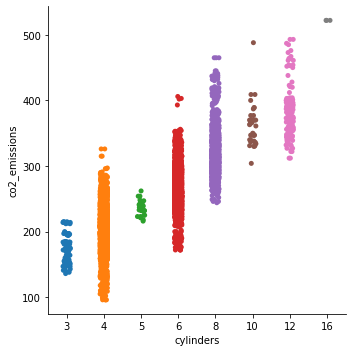

In [ ]:
# Co2 emission wrt no of cylinders
plt.figure(figsize=(10,8))

sns.catplot(x='cylinders', y='co2_emissions',data = Data)

plt.show()                              

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error

In [ ]:
# DATA PROCESSING
Data.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,CVT,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [ ]:
Data['transmission'].value_counts()

AS     3127
A      1851
M      1185
AM      646
CVT     576
Name: transmission, dtype: int64

In [ ]:
Data['fuel_type'].value_counts()

X              3637
Z              3202
Ethanol         370
Diesel          175
Natural gas       1
Name: fuel_type, dtype: int64

In [ ]:
Data_N = Data[Data['fuel_type']== 'Natural gas']

ind = Data_N.index

Data_N

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
2439,CHEVROLET,IMPALA DUAL FUEL,MID-SIZE,3.6,6,AS,Natural gas,15.2,9.5,12.7,22,213


In [ ]:
for i in ind:
    Data.drop(i, axis=0, inplace=True)   

In [ ]:
Data[Data['fuel_type']=='Natural gas']

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions


In [ ]:
Data_v =pd.get_dummies(Data['fuel_type'], prefix='Fuel', drop_first=True)
Data.v = pd.get_dummies(Data["transmission"], drop_first=True)
Data_v.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,Fuel_Ethanol,Fuel_X,Fuel_Z
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
Data.v.head()

,AM,AS,CVT,M
0,0,1,0,0
1,0,0,0,1
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [ ]:
df = [Data, Data_v,Data.v]

data = pd.concat(df, axis=1)
data.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,Fuel_Ethanol,Fuel_X,Fuel_Z,AM,AS,CVT,M
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196,0,0,1,0,1,0,0
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221,0,0,1,0,0,0,1
2,ACURA,ILX HYBRID,COMPACT,1.5,4,CVT,Z,6.0,5.8,5.9,48,136,0,0,1,0,0,1,0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255,0,0,1,0,1,0,0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244,0,0,1,0,1,0,0


In [ ]:
data.drop(['fuel_type'], inplace=True, axis=1)
data.drop(['transmission'], inplace=True, axis=1)

In [ ]:
data.head()

,make,model,vehicle_class,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,Fuel_Ethanol,Fuel_X,Fuel_Z,AM,AS,CVT,M
0,ACURA,ILX,COMPACT,2.0,4,9.9,6.7,8.5,33,196,0,0,1,0,1,0,0
1,ACURA,ILX,COMPACT,2.4,4,11.2,7.7,9.6,29,221,0,0,1,0,0,0,1
2,ACURA,ILX HYBRID,COMPACT,1.5,4,6.0,5.8,5.9,48,136,0,0,1,0,0,1,0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,12.7,9.1,11.1,25,255,0,0,1,0,1,0,0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,12.1,8.7,10.6,27,244,0,0,1,0,1,0,0


In [ ]:
#HANDLING OTHER CATAGORICAL FEATURES HAVING MULTIPLE CATAGORIES (MAKE , MODEL, VEHICLE CLASS)

In [ ]:
df_freq = data['make'].value_counts().to_dict()
mod_freq = data['model'].value_counts().to_dict()
veh_freq = data['vehicle_class'].value_counts().to_dict()

In [ ]:
data['make'] = data['make']. map(df_freq)
data['model'] = data['model']. map(mod_freq)
data['vehicle_class'] = data['vehicle_class']. map(veh_freq)

In [ ]:
data.head()

,make,model,vehicle_class,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,Fuel_Ethanol,Fuel_X,Fuel_Z,AM,AS,CVT,M
0,72,9,1022,2.0,4,9.9,6.7,8.5,33,196,0,0,1,0,1,0,0
1,72,9,1022,2.4,4,11.2,7.7,9.6,29,221,0,0,1,0,0,0,1
2,72,2,1022,1.5,4,6.0,5.8,5.9,48,136,0,0,1,0,0,1,0
3,72,1,1217,3.5,6,12.7,9.1,11.1,25,255,0,0,1,0,1,0,0
4,72,7,1217,3.5,6,12.1,8.7,10.6,27,244,0,0,1,0,1,0,0


In [ ]:
#DIVIDING DATA SET INTO INDEPENDENT AND DEPENDENT VARIABLE

In [ ]:
A = data.drop('co2_emissions', axis=1)
B = data['co2_emissions']

In [ ]:
A.head()

,make,model,vehicle_class,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),Fuel_Ethanol,Fuel_X,Fuel_Z,AM,AS,CVT,M
0,72,9,1022,2.0,4,9.9,6.7,8.5,33,0,0,1,0,1,0,0
1,72,9,1022,2.4,4,11.2,7.7,9.6,29,0,0,1,0,0,0,1
2,72,2,1022,1.5,4,6.0,5.8,5.9,48,0,0,1,0,0,1,0
3,72,1,1217,3.5,6,12.7,9.1,11.1,25,0,0,1,0,1,0,0
4,72,7,1217,3.5,6,12.1,8.7,10.6,27,0,0,1,0,1,0,0


In [ ]:
B.head()

0    196
1    221
2    136
3    255
4    244
Name: co2_emissions, dtype: int64

In [ ]:
data.shape

(7384, 17)

In [ ]:
#FEATURE SELECTION USING CHI-SQUARE TEST

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
ranked_feature = SelectKBest(score_func = chi2, k='all')
ordered_feature = ranked_feature.fit(A, B)

In [ ]:
top_feat = pd.DataFrame(ordered_feature.scores_ , columns=['score'])
top_feat['variables'] = A.columns

In [ ]:
top_feat.sort_values(by='score', ascending=False)

,score,variables
2,173723.188600,vehicle_class
0,95021.040629,make
8,13236.852695,fuel_consumption_comb(mpg)
5,6232.307799,fuel_consumption_city
7,4862.577319,fuel_consumption_comb(l/100km)
4,3412.144543,cylinders
3,3394.028026,engine_size
6,3293.816329,fuel_consumption_hwy
1,2612.972867,model
14,1938.744672,CVT


In [ ]:
#CREATING TRAINING SET AND TESTING SET

In [ ]:
# splitting of traing testing set into X and y

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(A, B, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5907, 16)
(1477, 16)
(5907,)
(1477,)


In [ ]:
y_test.head()


5632    368
1550    290
1128    382
6498    211
3270    193
Name: co2_emissions, dtype: int64

In [ ]:
#FEATURE SCALING USING STANDARDIZATION

In [ ]:
# STANDARDIZATION
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler =StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.27521116, -0.68670295, -1.80962504, ..., -0.85157221,
        -0.29299418, -0.44024503],
       [-0.54676246, -0.68670295, -0.42577231, ...,  1.17429853,
        -0.29299418, -0.44024503],
       [ 1.2100082 , -0.87774305, -0.52091218, ...,  1.17429853,
        -0.29299418, -0.44024503],
       ...,
       [ 0.11826113, -0.30462276, -0.14900176, ..., -0.85157221,
         3.4130371 , -0.44024503],
       [-0.27521116, -0.30462276,  1.24061702, ..., -0.85157221,
         3.4130371 , -0.44024503],
       [-1.17299301, -1.06878314, -0.71695798, ..., -0.85157221,
        -0.29299418, -0.44024503]])

In [ ]:
data['co2_emissions'].mean()

250.58978873239437

In [ ]:
#AUTO EDA

In [ ]:
# 1. PANDAS PROFILING

In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport



In [ ]:
#MODEL IMPLEMENTATION (Approach 1)
# 1. LINEAR REGRESSION

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.intercept_

250.98357880480785

In [ ]:
model.coef_

array([  0.09846243,  -0.09126632,  -0.03196586,   0.25410999,
         2.17469937,  24.28719842,  13.07132844,  20.53745833,
        -6.35439345, -30.19620392, -15.09009955, -15.35456651,
         0.23148656,   0.08078333,   0.04367345,  -0.06301487])

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([359.06209907, 292.97346311, 377.59960241, ..., 341.77783102,
       193.05390931, 177.97061893])

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.918260935039375

In [ ]:
r2_score(y_test, y_pred)

0.993041824997087

In [ ]:
frames = [y_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T

In [ ]:
lin_pred = result_pred.rename(columns={0: 'pred_values',1:'real_values'})
lin_pred['pred_values'] = lin_pred['pred_values'].map(lambda x: round(x,2))

lin_pred

,pred_values,real_values
0,359.06,368.0
1,292.97,290.0
2,377.60,382.0
3,210.80,211.0
4,192.94,193.0
...,...,...
1472,233.49,235.0
1473,262.28,263.0
1474,341.78,346.0
1475,193.05,193.0


In [ ]:
lin_pred['diff'] = abs(lin_pred['pred_values'] - lin_pred['real_values'])

print('mean diff: ', (abs(lin_pred['diff']).mean()))

mean diff:  2.979058903182132


In [ ]:
lin_pred.head(10)

,pred_values,real_values,diff
0,359.06,368.0,8.94
1,292.97,290.0,2.97
2,377.60,382.0,4.40
3,210.80,211.0,0.20
4,192.94,193.0,0.06
5,249.45,244.0,5.45
6,213.25,210.0,3.25
7,174.25,174.0,0.25
8,266.72,268.0,1.28
9,303.68,305.0,1.32


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


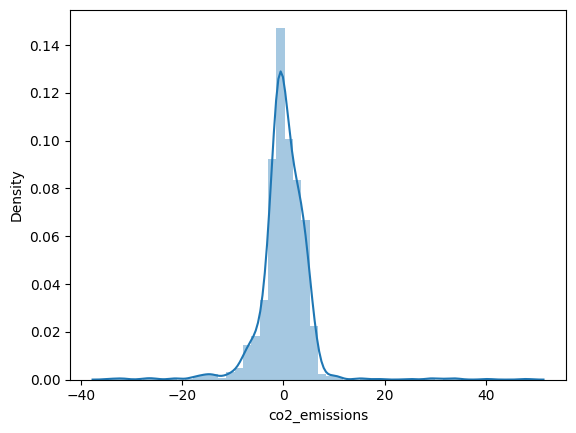

In [ ]:
sns.distplot(y_pred-y_test)

Text(0, 0.5, 'y_pred')

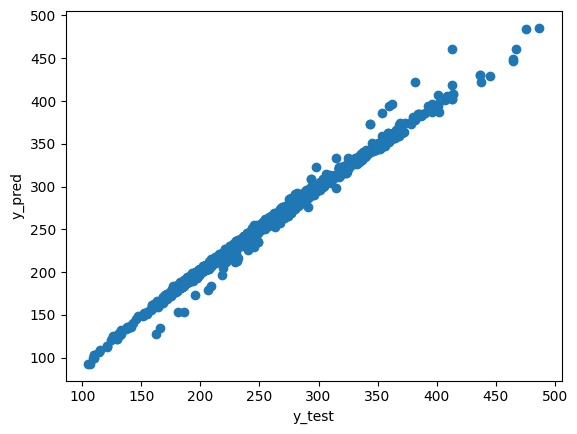

In [ ]:
plt.scatter( y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


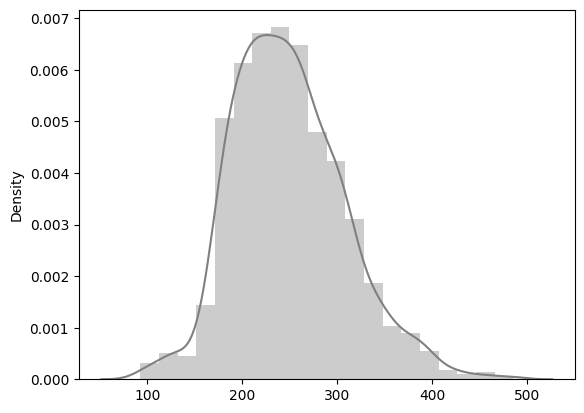

In [ ]:
sns.distplot(y_pred, bins=20,color='grey')
plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


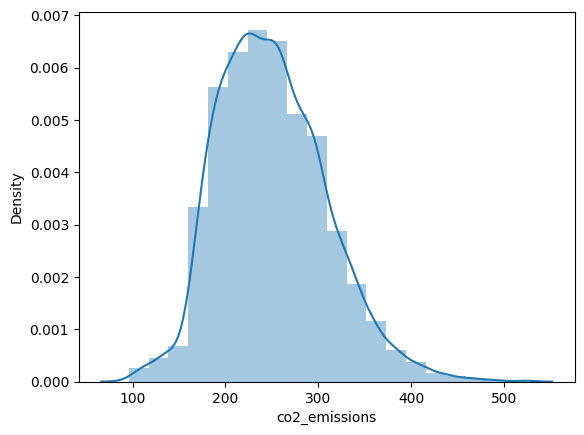

In [ ]:
sns.distplot(data['co2_emissions'], bins=20)
plt.show()

In [ ]:
#LASSO REGRESSION

In [ ]:
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
model.coef_

array([ 4.20041307e-02, -3.38666762e-02, -2.19939755e-02,  2.85616447e-01,
        2.34588889e+00,  3.30910520e+01,  1.77107872e+01,  6.73478001e+00,
       -6.35577430e+00, -2.86986818e+01, -1.23171566e+01, -1.24938607e+01,
        6.46424554e-02,  0.00000000e+00, -2.45759223e-02, -9.30795711e-02])

In [ ]:
y_lasso_pred = model.predict(X_test)
y_lasso_pred

array([358.80530859, 292.87701247, 376.80100438, ..., 341.30143034,
       193.30696393, 178.1886792 ])

In [ ]:
np.sqrt(mean_squared_error(y_test,y_lasso_pred ))

5.0077567284742655

In [ ]:
r2_score(y_lasso_pred, y_test)

0.992744799682859

In [ ]:
frames = [y_lasso_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred



,0,1
0,358.805309,368.0
1,292.877012,290.0
2,376.801004,382.0
3,211.356015,211.0
4,193.330992,193.0
...,...,...
1472,233.484970,235.0
1473,262.240284,263.0
1474,341.301430,346.0
1475,193.306964,193.0


In [ ]:
lasso_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
lasso_pred['pred_values'] = (lasso_pred['pred_values'].map(lambda x: round(x,2)))

lasso_pred['diff'] = abs(lasso_pred['real_values'] -lasso_pred['pred_values'])


print('mean diff: ', abs(lasso_pred['diff']).mean())

mean diff:  3.069580230196342


In [ ]:
lasso_pred.head(10)

,pred_values,real_values,diff
0,358.81,368.0,9.19
1,292.88,290.0,2.88
2,376.80,382.0,5.20
3,211.36,211.0,0.36
4,193.33,193.0,0.33
5,249.52,244.0,5.52
6,213.49,210.0,3.49
7,174.49,174.0,0.49
8,266.66,268.0,1.34
9,303.63,305.0,1.37


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


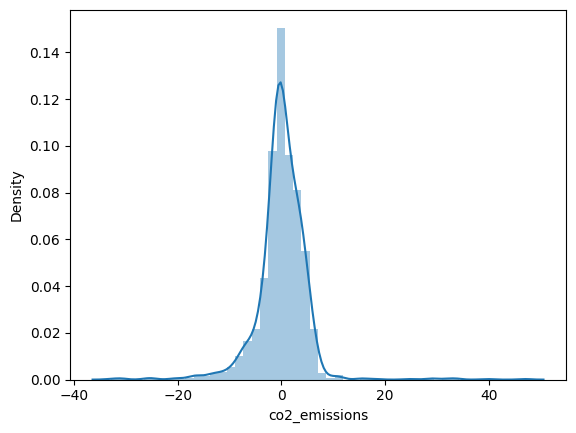

In [ ]:
sns.distplot(y_lasso_pred-y_test)

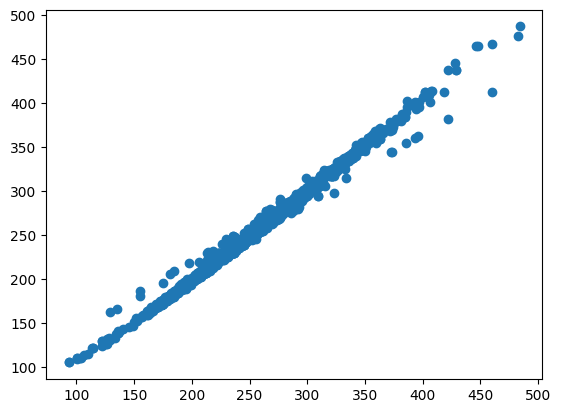

In [ ]:
plt.scatter(y_lasso_pred, y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


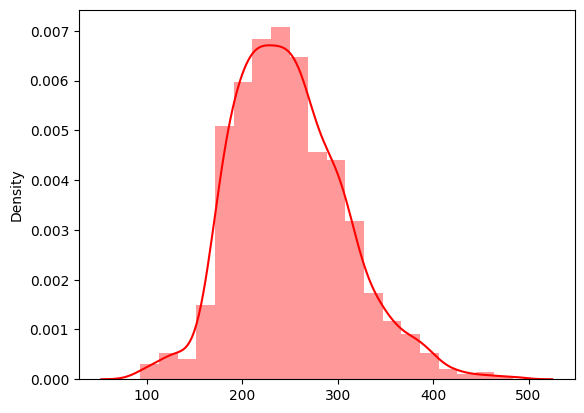

In [ ]:
sns.distplot(y_lasso_pred, bins=20,color='red')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


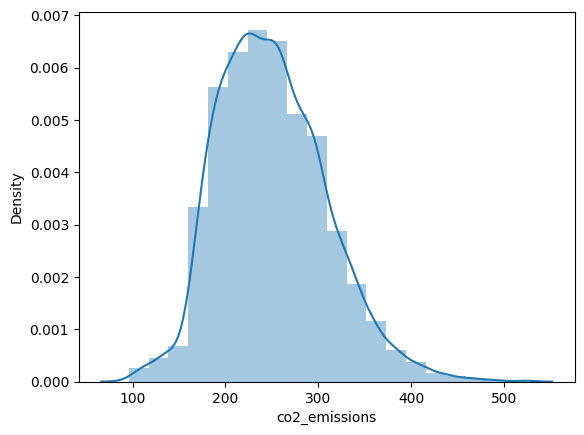

In [ ]:
sns.distplot(data['co2_emissions'], bins=20)
plt.show()

In [ ]:
#RIDGE REGRESSION

In [ ]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
model.intercept_

250.98357880480785

In [ ]:
model.coef_

array([  0.09841029,  -0.09161366,  -0.03222958,   0.2558121 ,
         2.17648484,  24.2726163 ,  13.06943958,  20.54604618,
        -6.35750616, -30.18992807, -15.08115372, -15.34562559,
         0.23127773,   0.08070157,   0.04296444,  -0.06310731])

In [ ]:
y_ridge = model.predict(X_test)
y_ridge

array([359.06018255, 292.97100386, 377.58924253, ..., 341.77795273,
       193.05362993, 177.97170003])

In [ ]:
np.sqrt(mean_squared_error(y_ridge,y_test))

4.918235884377936

In [ ]:
r2_score(y_test,y_ridge)

0.9930418958784187

In [ ]:
frames = [y_ridge, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred

,0,1
0,359.060183,368.0
1,292.971004,290.0
2,377.589243,382.0
3,210.799644,211.0
4,192.941622,193.0
...,...,...
1472,233.492009,235.0
1473,262.283366,263.0
1474,341.777953,346.0
1475,193.053630,193.0


In [ ]:
ridge_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
ridge_pred['pred_values'] = (ridge_pred['pred_values'].map(lambda x: round(x,2)))

ridge_pred['diff'] = abs(ridge_pred['real_values'] -ridge_pred['pred_values'])


print('mean diff: ', abs(ridge_pred['diff']).mean())

ridge_pred.head(10)

mean diff:  2.9794312796208584


,pred_values,real_values,diff
0,359.06,368.0,8.94
1,292.97,290.0,2.97
2,377.59,382.0,4.41
3,210.80,211.0,0.20
4,192.94,193.0,0.06
5,249.45,244.0,5.45
6,213.25,210.0,3.25
7,174.25,174.0,0.25
8,266.72,268.0,1.28
9,303.68,305.0,1.32


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


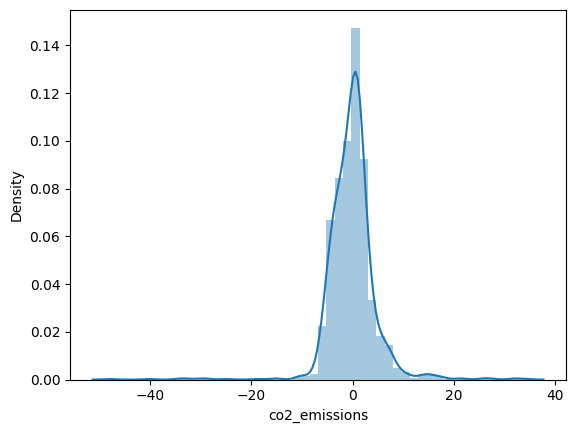

In [ ]:
sns.distplot(y_test-y_ridge)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


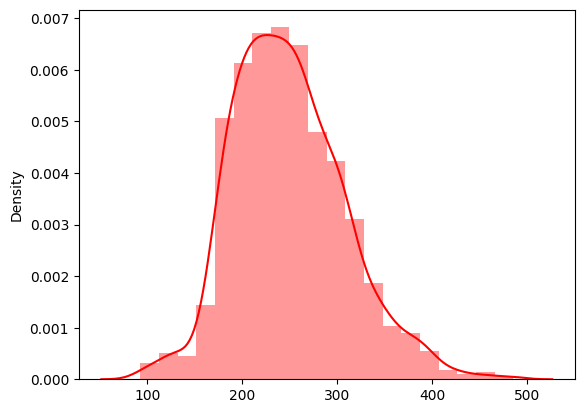

In [ ]:
sns.distplot(y_ridge, bins=20,color='red')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


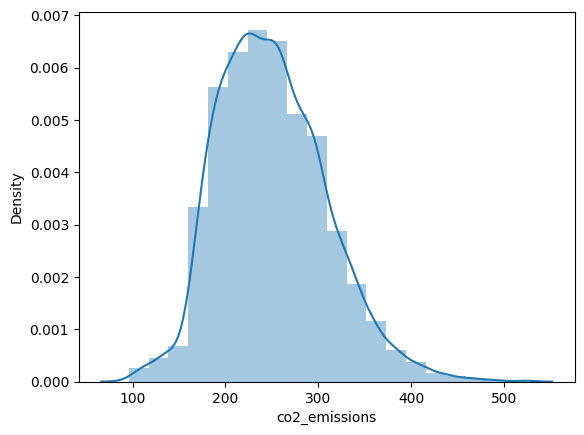

In [ ]:
sns.distplot(data['co2_emissions'], bins=20)
plt.show()

In [ ]:
# DECISION TREE REGRESSION
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 42)

model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
dtr_pred = model.predict(X_test)
dtr_pred

array([356., 290., 382., ..., 343., 193., 177.])

In [ ]:
np.sqrt(mean_squared_error(y_test,dtr_pred ))

3.8296449094401055

In [ ]:
r2_score(y_test, dtr_pred)

0.9957811971600585

In [ ]:
frames = [dtr_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

,0,1
0,356.0,368.0
1,290.0,290.0
2,382.0,382.0
3,211.0,211.0
4,193.0,193.0


In [ ]:
dtr_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
dtr_pred['pred_values'] = (dtr_pred['pred_values'].map(lambda x: round(x,2)))

dtr_pred['diff'] = abs(dtr_pred['real_values'] -dtr_pred['pred_values'])


print('mean diff: ', abs(dtr_pred['diff']).mean())

dtr_pred.head(10)

mean diff:  1.84895057549086


,pred_values,real_values,diff
0,356.0,368.0,12.0
1,290.0,290.0,0.0
2,382.0,382.0,0.0
3,211.0,211.0,0.0
4,193.0,193.0,0.0
5,244.0,244.0,0.0
6,210.0,210.0,0.0
7,174.0,174.0,0.0
8,268.0,268.0,0.0
9,304.6,305.0,0.4


In [ ]:
# RANDOM FOREST
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_rf_pred = rf_model.predict(X_test)
y_rf_pred

array([359.12      , 290.638     , 382.95      , ..., 343.078     ,
       190.43183333, 177.57266667])

In [ ]:
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_rf_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_rf_pred)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_rf_pred)))

RMSE: 3.2093
MAE: 1.9434
R2_score: 0.9970


In [ ]:
frames = [y_rf_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

,0,1
0,359.120000,368.0
1,290.638000,290.0
2,382.950000,382.0
3,211.430000,211.0
4,192.666667,193.0


In [ ]:
y_rf_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
y_rf_pred['pred_values'] = (y_rf_pred['pred_values'].map(lambda x: round(x,2)))

y_rf_pred['diff'] = abs(y_rf_pred['real_values'] -y_rf_pred['pred_values'])


print('mean diff: ', abs(y_rf_pred['diff']).mean())

mean diff:  1.9433852403520682


In [ ]:
y_rf_pred.head(10)

,pred_values,real_values,diff
0,359.12,368.0,8.88
1,290.64,290.0,0.64
2,382.95,382.0,0.95
3,211.43,211.0,0.43
4,192.67,193.0,0.33
5,245.26,244.0,1.26
6,211.26,210.0,1.26
7,174.48,174.0,0.48
8,266.59,268.0,1.41
9,304.60,305.0,0.40


In [ ]:
# SIMPLE VECTOR MACHINE

In [ ]:

from sklearn.svm import LinearSVR
model = LinearSVR()
model.fit(X_train, y_train)
y_svr_pred = model.predict(X_test)
y_svr_pred

array([363.44811331, 294.14996848, 383.27208685, ..., 344.8044095 ,
       191.83701256, 177.08304752])

In [ ]:
np.sqrt(mean_squared_error(y_svr_pred,y_test))

5.425944357736305

In [ ]:
r2_score(y_svr_pred,y_test)

0.9918598374091743

In [ ]:
frames = [y_svr_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

,0,1
0,363.448113,368.0
1,294.149968,290.0
2,383.272087,382.0
3,210.689249,211.0
4,192.516321,193.0


In [ ]:
y_svr_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
y_svr_pred['pred_values'] = (y_svr_pred['pred_values'].map(lambda x: round(x,2)))

y_svr_pred['diff'] = abs(y_svr_pred['real_values'] -y_svr_pred['pred_values'])


print('mean diff: ', abs(y_svr_pred['diff']).mean())

y_svr_pred.head(10)

mean diff:  2.8000744752877456


,pred_values,real_values,diff
0,363.45,368.0,4.55
1,294.15,290.0,4.15
2,383.27,382.0,1.27
3,210.69,211.0,0.31
4,192.52,193.0,0.48
5,248.73,244.0,4.73
6,211.05,210.0,1.05
7,174.30,174.0,0.30
8,266.69,268.0,1.31
9,304.29,305.0,0.71


In [ ]:
# APPROACH 2

In [ ]:
models =['LinReg','LasReg','RidReg','DT', 'RF',"SVR"]

frame = pd.DataFrame(columns={'models':[],'rmse_train':[], 'mae_train':[],'r2_train':[] ,'rmse_test':[], 'mae_test':[],'r2_test':[]})




for i in range(len(models)):
    if models[i] == 'LinReg':
        model = LinearRegression()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Linear Regression', rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    elif models[i] =='LasReg':
        model = Lasso(alpha=0.1)
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Lasso Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    elif models[i] =='RidReg':
        model = Ridge(alpha=0.1)
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Ridge Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    elif models[i] =='DT':
        model = DecisionTreeRegressor()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Decision Tree Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    elif models[i] =='RF':
        model = RandomForestRegressor()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
       
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Random Forest Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    else :
        models[i] =='SVM'
        model = LinearSVR()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Simple Vector Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]

In [ ]:
#OVERALL PERFORMANCE OF ALL MODELS IN A DATAFRAME

In [ ]:
frame

,models,rmse_train,mae_train,r2_train,rmse_test,mae_test,r2_test
0,Linear Regression,4.962163,2.996013,0.992778,4.918261,2.979052,0.993042
1,Lasso Regression,5.042967,3.066624,0.992541,5.007757,3.069601,0.992786
2,Ridge Regression,4.962164,2.996321,0.992778,4.918236,2.979439,0.993042
3,Decision Tree Regression,0.939813,0.318859,0.999741,3.975206,1.881596,0.995454
4,Random Forest Regression,1.468431,0.875641,0.999368,3.251664,1.978089,0.996959
5,Simple Vector Regression,5.354996,2.713487,0.991590,5.441627,2.808221,0.991482
